<a href="https://colab.research.google.com/github/safaissaoui/Data-Visualization/blob/master/explore_vaccines_tweets_2021_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>Explore Vaccines Tweets</h1></center>


<center><img src="https://images.unsplash.com/photo-1605377347958-e8bd4c00ba1d?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=700&q=80" width=400><img></center>

# Introduction


The Dataset we are using here is collected using Twitter API, **tweepy** and Python package.

The following vaccines are included:  
* Pfizer/BioNTech;   
* Sinopharm;  
* Sinovac;  
* Moderna;  
* Oxford/AstraZeneca;   
* Covaxin;   
* Sputnik V.  



# Data preparation

## Load packages

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.simplefilter("ignore")

## Load data

In [ ]:
tweets_df = pd.read_csv("/content/vaccination_all_tweets.csv")

# Data exploration


## Glimpse the data

In [ ]:
print(f"data shape: {tweets_df.shape}")

data shape: (10221, 16)


In [ ]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10221 entries, 0 to 10220
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10221 non-null  int64  
 1   user_name         10221 non-null  object 
 2   user_location     7927 non-null   object 
 3   user_description  9526 non-null   object 
 4   user_created      10221 non-null  object 
 5   user_followers    10221 non-null  int64  
 6   user_friends      10221 non-null  int64  
 7   user_favourites   10221 non-null  int64  
 8   user_verified     10221 non-null  bool   
 9   date              10221 non-null  object 
 10  text              10221 non-null  object 
 11  hashtags          7937 non-null   object 
 12  source            10220 non-null  object 
 13  retweets          10220 non-null  float64
 14  favorites         10220 non-null  float64
 15  is_retweet        10220 non-null  object 
dtypes: bool(1), float64(2), int64(4), object

In [ ]:
tweets_df.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,1.022100e+04,1.022100e+04,10221.000000,1.022100e+04,10220.000000,10220.000000
mean,1.353407e+18,7.170287e+04,1438.339301,1.396204e+04,2.451370,9.938258
std,7.827741e+15,6.310903e+05,8390.480424,4.172694e+04,28.849775,75.122799
min,1.337728e+18,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.347240e+18,1.280000e+02,151.000000,3.400000e+02,0.000000,0.000000
50%,1.356983e+18,5.700000e+02,446.000000,2.025000e+03,0.000000,1.000000
75%,1.360109e+18,2.597000e+03,1260.000000,1.039300e+04,1.000000,4.000000
max,1.364748e+18,1.474501e+07,380362.000000,1.205878e+06,2247.000000,3090.000000


In [ ]:
tweets_df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0.0,0.0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1.0,1.0,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0.0,0.0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446.0,2129.0,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0.0,0.0,False


### Missing data

In [ ]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [ ]:
missing_data(tweets_df)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
Total,0,0,2294,695,0,0,0,0,0,0,0,2284,1,1,1,1
Percent,0,0,22.444,6.79973,0,0,0,0,0,0,0,22.3462,0.00978378,0.00978378,0.00978378,0.00978378
Types,int64,object,object,object,object,int64,int64,int64,bool,object,object,object,object,float64,float64,object


### Unique values

In [ ]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))

In [ ]:
unique_values(tweets_df)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
Total,10221,10221,7927,9526,10221,10221,10221,10221,10221,10221,10221,7937,10220,10220,10220,10220
Uniques,10221,6457,2816,6110,6476,3657,2662,5438,2,10181,10212,4454,86,100,210,1


### Most frequent values

In [ ]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [ ]:
most_frequent_values(tweets_df)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
Total,10221,10221,7927,9526,10221,10221,10221,10221,10221,10221,10221,7937,10220,10220,10220,10220
Most frequent item,1348722528408268800,Workout Solutions,India,Official Twitter account of Ilke News Agency /,2020-05-21 15:54:09,1,0,0,False,2021-02-09 07:30:00,#Covid19 Vaccine Rollout Needs Spark Even More...,['PfizerBioNTech'],Twitter Web App,0,0,False
Frequence,1,64,130,64,67,72,91,138,9102,3,5,682,3350,6920,4209,10220
Percent from total,0.01,0.626,1.64,0.672,0.656,0.704,0.89,1.35,89.052,0.029,0.049,8.593,32.779,67.71,41.184,100


## Visualize the data distribution

In [ ]:
def plot_count(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    else:
        g = sns.countplot(df[feature], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()    

### User name

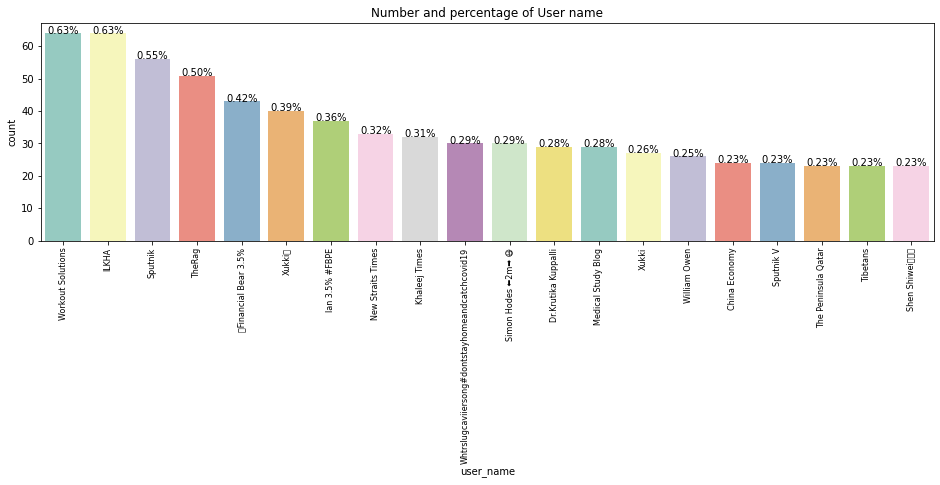

In [ ]:
plot_count("user_name", "User name", tweets_df,4)

### User location

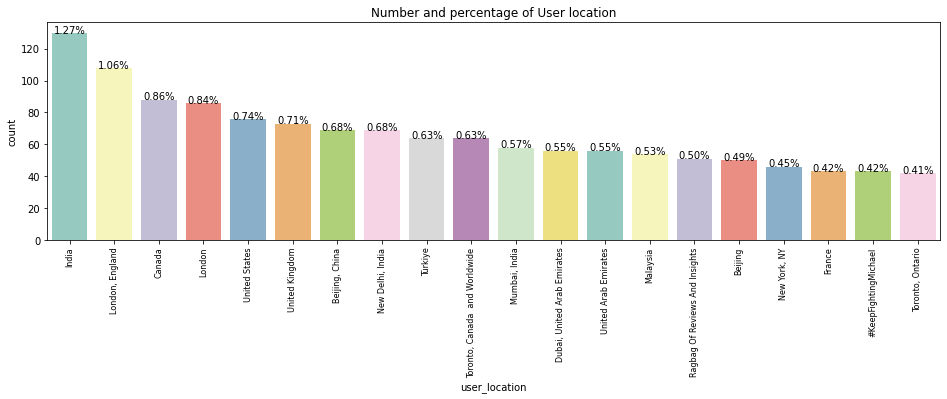

In [ ]:
plot_count("user_location", "User location", tweets_df,4)

### Tweet source

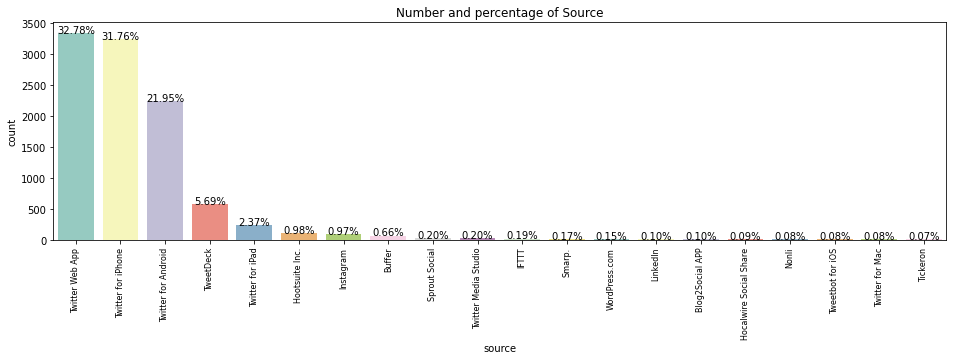

In [ ]:
plot_count("source", "Source", tweets_df,4)

In [ ]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [ ]:

from wordcloud import WordCloud, STOPWORDS
def show_wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="black").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

### Text wordcloauds

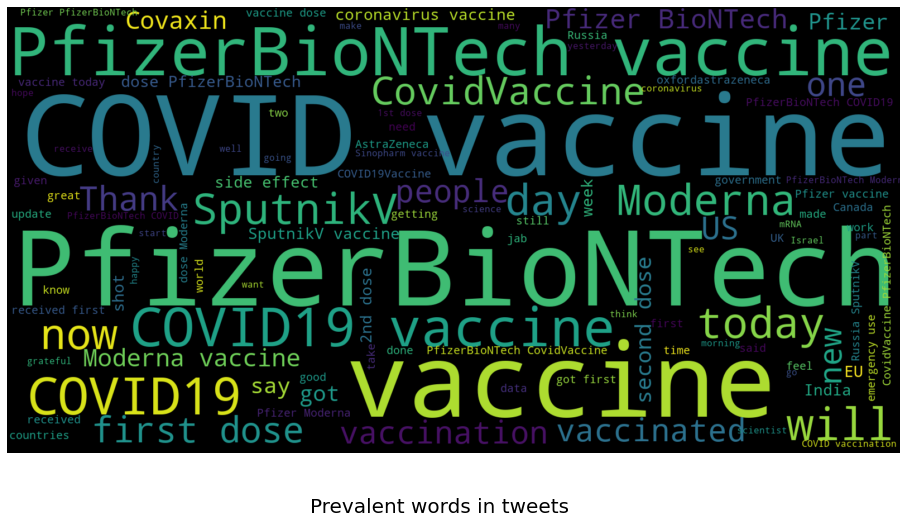

In [ ]:
show_wordcloud(tweets_df['text'], title = 'Prevalent words in tweets')

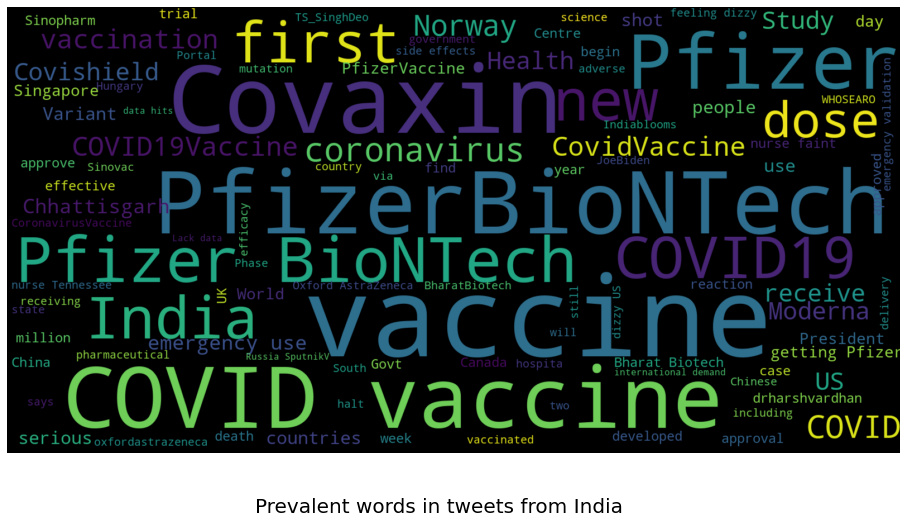

In [ ]:
india_df = tweets_df.loc[tweets_df.user_location=="India"]
show_wordcloud(india_df['text'], title = 'Prevalent words in tweets from India')

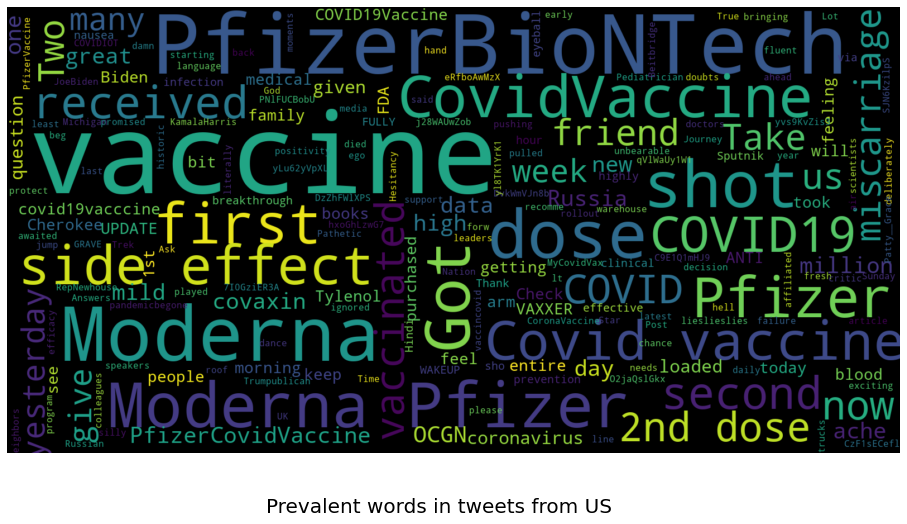

In [ ]:
us_df = tweets_df.loc[tweets_df.user_location=="United States"]
show_wordcloud(us_df['text'], title = 'Prevalent words in tweets from US')

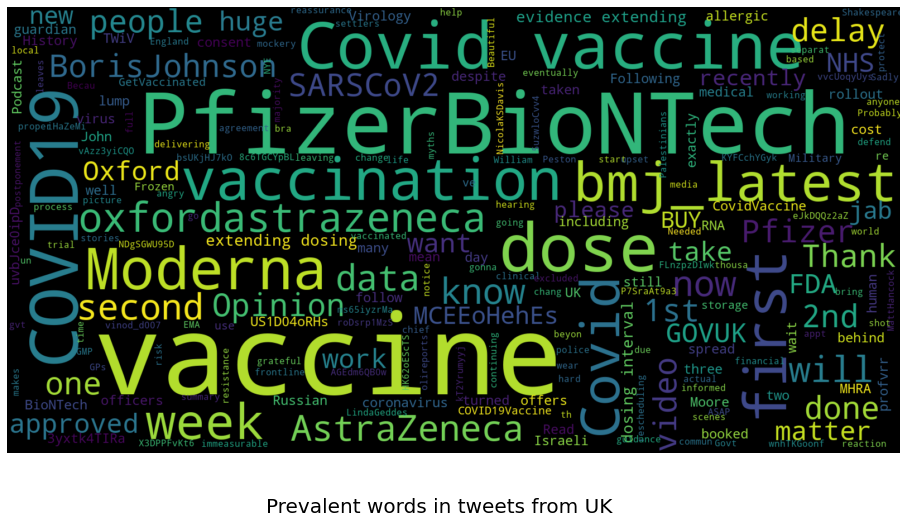

In [ ]:
uk_df = tweets_df.loc[tweets_df.user_location=="United Kingdom"]
show_wordcloud(uk_df['text'], title = 'Prevalent words in tweets from UK')

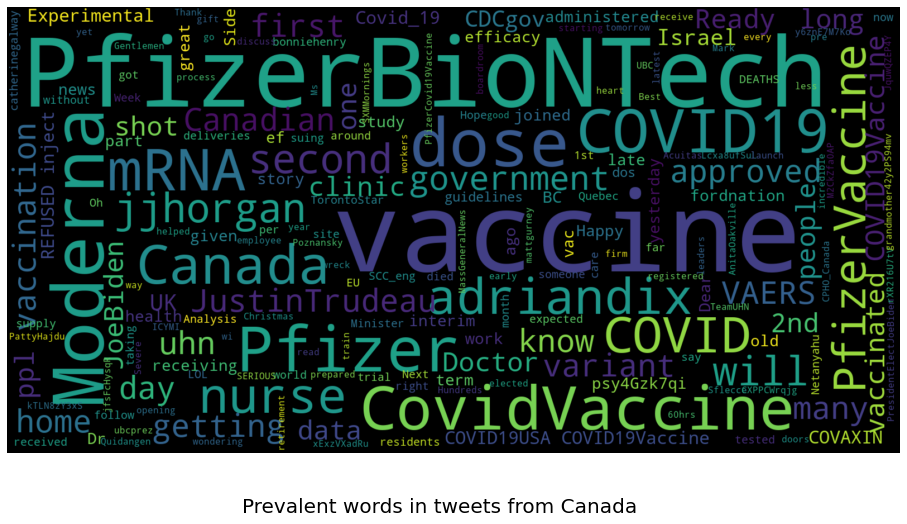

In [ ]:
ca_df = tweets_df.loc[tweets_df.user_location=="Canada"]
show_wordcloud(ca_df['text'], title = 'Prevalent words in tweets from Canada')

### Hashtags analysis

In [ ]:
def plot_features_distribution(features, title, df, isLog=False):
    plt.figure(figsize=(12,6))
    plt.title(title)
    for feature in features:
        if(isLog):
            sns.distplot(np.log1p(df[feature]),kde=True,hist=False, bins=120, label=feature)
        else:
            sns.distplot(df[feature],kde=True,hist=False, bins=120, label=feature)
    plt.xlabel('')
    plt.legend()
    plt.show()


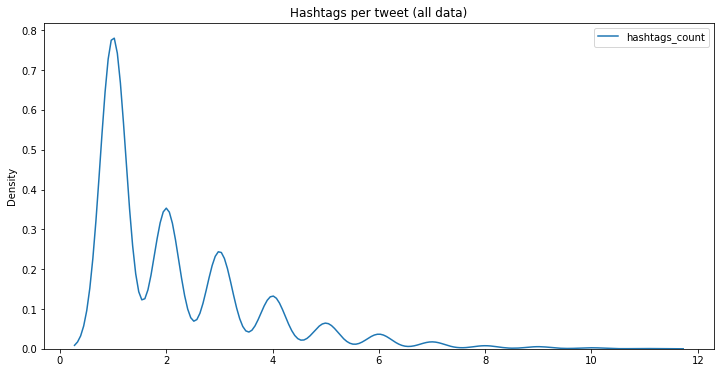

In [ ]:
tweets_df['hashtags'] = tweets_df['hashtags'].replace(np.nan, "['None']", regex=True)
tweets_df['hashtags'] = tweets_df['hashtags'].apply(lambda x: x.replace('\\N',''))
tweets_df['hashtags_count'] = tweets_df['hashtags'].apply(lambda x: len(x.split(',')))
plot_features_distribution(['hashtags_count'], 'Hashtags per tweet (all data)', tweets_df)

In [ ]:
tweets_df['hashtags_individual'] = tweets_df['hashtags'].apply(lambda x: x.split(','))
from itertools import chain
all_hashtags = set(chain.from_iterable(list(tweets_df['hashtags_individual'])))
print(f"There are totally: {len(all_hashtags)}")

There are totally: 4398


In [ ]:
tweets_df['hashtags_individual'].head()

0                                 [['PfizerBioNTech']]
1                                           [['None']]
2    [['coronavirus',  'SputnikV',  'AstraZeneca', ...
3                                           [['None']]
4    [['whereareallthesickpeople',  'PfizerBioNTech']]
Name: hashtags_individual, dtype: object

### Extract country from location

We load the country list from the additional database we added to this Notebook. We also create a `country` column in the original dataset.

In [ ]:
country_df = pd.read_csv("/content/wikipedia-iso-country-codes.csv")

In [ ]:
country_df.columns = ["country", "alpha2", "alpha3", "numeric", "iso"]
country_df.head()

,country,alpha2,alpha3,numeric,iso
0,Zimbabwe,ZW,ZWE,716,ISO 3166-2:ZW
1,Zambia,ZM,ZMB,894,ISO 3166-2:ZM
2,Yemen,YE,YEM,887,ISO 3166-2:YE
3,Western Sahara,EH,ESH,732,ISO 3166-2:EH
4,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF


In [ ]:
tweets_df['country'] = tweets_df['user_location']

We merge the countries dataset with the tweets dataset.

In [ ]:
tweets_df = tweets_df.merge(country_df, on="country")

In [ ]:
tweets_df.head(10)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,hashtags_count,hashtags_individual,country,alpha2,alpha3,numeric,iso
0,1337815730486702087,WION,India,#WION: World Is One | Welcome to India’s first...,2016-03-21 03:44:54,292510,91,7531,True,2020-12-12 17:45:00,The agency also released new information for h...,['None'],TweetDeck,0.0,18.0,False,1,[['None']],India,IN,IND,356,ISO 3166-2:IN
1,1338574693087936513,Prof. Manish Thakur,India,#Proprietor English Academy #Blockchain #AI #I...,2012-06-11 13:50:05,3372,1713,119631,False,2020-12-14 20:00:51,#UgurSahin #ozlemtureci the #Muslim Scientists...,"['UgurSahin', 'ozlemtureci', 'Muslim', 'Pfizer...",Twitter for Android,0.0,0.0,False,4,"[['UgurSahin', 'ozlemtureci', 'Muslim', 'Pf...",India,IN,IND,356,ISO 3166-2:IN
2,1338551175587786752,India Blooms,India,A news and reference portal on India and a 24X...,2009-10-10 11:19:34,16816,2448,20,False,2020-12-14 18:27:23,Toronto to receive Ontario's 1st doses of Pfiz...,['Ontario'],Twitter Web App,0.0,0.0,False,1,[['Ontario']],India,IN,IND,356,ISO 3166-2:IN
3,1338466008466505728,Rachna Tandon,India,"District Epidemiologist, Meerut (IDSP). MDI-Gu...",2014-10-02 20:07:17,72,120,66,False,2020-12-14 12:48:58,More approvals to #PfizerBioNTech vaccine: #Si...,"['PfizerBioNTech', 'Singapore', 'CovidVaccine']",Twitter Web App,0.0,0.0,False,3,"[['PfizerBioNTech', 'Singapore', 'CovidVacci...",India,IN,IND,356,ISO 3166-2:IN
4,1338377471360569347,India.com,India,Follow https://t.co/RBTHZHv1ga for breaking ne...,2009-03-04 16:20:07,13417,399,349,True,2020-12-14 06:57:09,#Pfizervaccine is unlikely to be available in ...,"['Pfizervaccine', 'PfizerBioNTech']",TweetDeck,0.0,0.0,False,2,"[['Pfizervaccine', 'PfizerBioNTech']]",India,IN,IND,356,ISO 3166-2:IN
5,1338016390679244801,"Alive,🦅🦁",India,#Ambedkarite\nMasters #Pharmacy #Researcher. \...,2015-08-16 17:42:27,291,1756,13707,False,2020-12-13 07:02:21,I pucking do not intend to get vaccinated. Wht...,['None'],Twitter for Android,0.0,0.0,False,1,[['None']],India,IN,IND,356,ISO 3166-2:IN
6,1338696748374446083,Business Today,India,India's leading business magazine. Reports lat...,2010-06-30 14:55:57,1073859,374,2062,True,2020-12-15 04:05:51,"'Victory day for science!': US, Canada start m...",['CoronavirusVaccine'],Twitter Web App,0.0,4.0,False,1,[['CoronavirusVaccine']],India,IN,IND,356,ISO 3166-2:IN
7,1339305268753039361,Mohammad Arafat,India,Telegram channel\nhttps://t.co/gSotQ3oPde,2009-08-03 09:09:44,1444,100,15,False,2020-12-16 20:23:53,BREAKING #PfizerBioNTech #COVID19 #vaccine pro...,"['PfizerBioNTech', 'COVID19', 'vaccine', 'USA']",Twitter for Android,0.0,0.0,False,4,"[['PfizerBioNTech', 'COVID19', 'vaccine', '...",India,IN,IND,356,ISO 3166-2:IN
8,1339259544237604864,India Blooms,India,A news and reference portal on India and a 24X...,2009-10-10 11:19:34,16795,2447,20,False,2020-12-16 17:22:12,Canada: Alberta plans to send COVID-19 teams t...,['None'],Twitter Web App,0.0,0.0,False,1,[['None']],India,IN,IND,356,ISO 3166-2:IN
9,1339192370680586240,Oneindia News,India,https://t.co/b2BCDYhPGV is a gamut of online r...,2008-12-16 09:44:12,64346,619,593,True,2020-12-16 12:55:16,Photos: Public Reaction To Pfizer-BioNTech COV...,"['covid', 'Covid_19', 'CovidVaccine', 'COVID19...",Twitter Web App,0.0,3.0,False,4,"[['covid', 'Covid_19', 'CovidVaccine', 'COV...",India,IN,IND,356,ISO 3166-2:IN


In [ ]:
tw_add_df = tweets_df.groupby(["country", "iso", "alpha3"])['text'].count().reset_index()
tw_add_df.columns = ["country", "iso", "alpha3", "tweets"]

In [ ]:
import plotly.express as px

def plot_map(dd_df, title):
    hover_text = []
    for index, row in dd_df.iterrows():
        hover_text.append((f"country: {row['country']}<br>tweets: {row['tweets']}\
                          <br>country code: {row['iso']}<br>country alpha3: {row['alpha3']}"))
    dd_df['hover_text'] = hover_text

    fig = px.choropleth(dd_df, 
                        locations="alpha3",
                        hover_name='hover_text',
                        color="tweets",
                        projection="natural earth",
                        color_continuous_scale=px.colors.sequential.Plasma,
                        width=900, height=700)
    fig.update_geos(   
        showcoastlines=True, coastlinecolor="DarkBlue",
        showland=True, landcolor="LightGrey",
        showocean=True, oceancolor="LightBlue",
        showlakes=True, lakecolor="Blue",
        showrivers=True, rivercolor="Blue",
        showcountries=True, countrycolor="DarkBlue"
    )
    fig.update_layout(title = title, geo_scope="world")
    fig.show()    

In [ ]:
print(f"tweets containing country information: {tw_add_df.tweets.sum()}")
print(f"tweets containing country information; distinct countries: {tw_add_df.country.shape[0]}")

tweets containing country information: 997
tweets containing country information; distinct countries: 84


In [ ]:
plot_map(tw_add_df, "Tweets per country (where country is specified)")

### Extract date and time features

In [ ]:
tweets_df['datedt'] = pd.to_datetime(tweets_df['date'])

In [ ]:
tweets_df['year'] = tweets_df['datedt'].dt.year
tweets_df['month'] = tweets_df['datedt'].dt.month
tweets_df['day'] = tweets_df['datedt'].dt.day
tweets_df['dayofweek'] = tweets_df['datedt'].dt.dayofweek
tweets_df['hour'] = tweets_df['datedt'].dt.hour
tweets_df['minute'] = tweets_df['datedt'].dt.minute
tweets_df['dayofyear'] = tweets_df['datedt'].dt.dayofyear
tweets_df['date_only'] = tweets_df['datedt'].dt.date

### Time variation

In [ ]:
tweets_agg_df = tweets_df.groupby(["date_only"])["text"].count().reset_index()
tweets_agg_df.columns = ["date_only", "count"]

In [ ]:
def plot_time_variation(df, x='date_only', y='count', hue=None, size=1, title="", is_log=False):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    g = sns.lineplot(x=x, y=y, hue=hue, data=df)
    plt.xticks(rotation=90)
    if hue:
        plt.title(f'{y} grouped by {hue} | {title}')
    else:
        plt.title(f'{y} | {title}')
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show() 

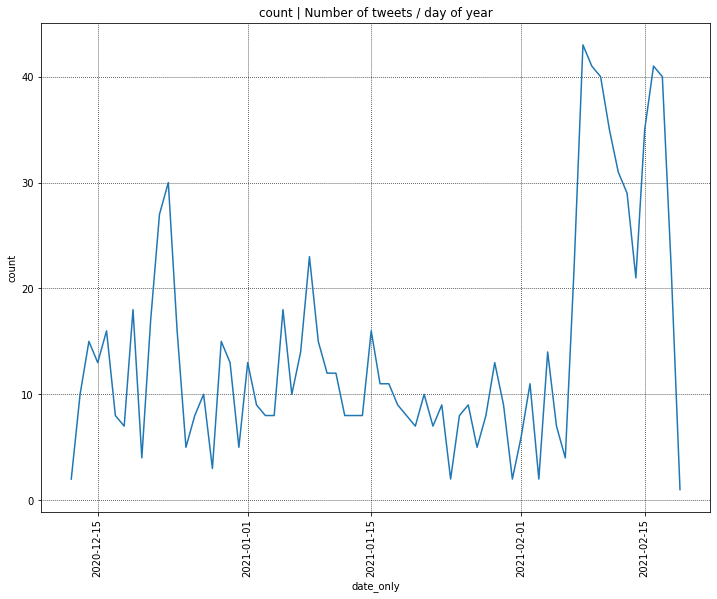

In [ ]:
plot_time_variation(tweets_agg_df, title="Number of tweets / day of year",size=3)

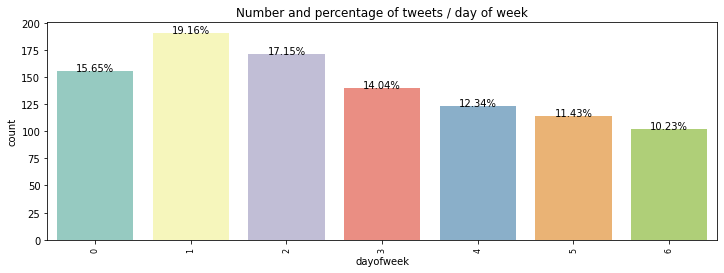

In [ ]:
plot_count("dayofweek", "tweets / day of week", tweets_df, size=3, ordered=False)

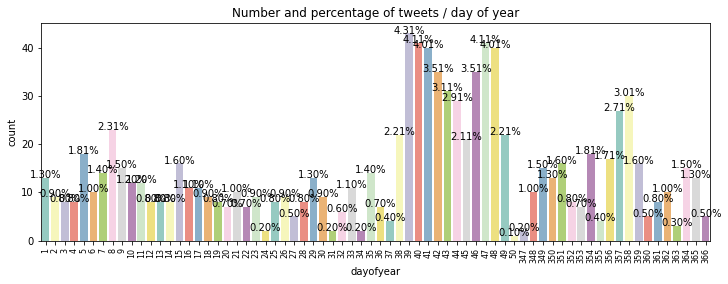

In [ ]:
plot_count("dayofyear", "tweets / day of year", tweets_df, size=3, ordered=False)

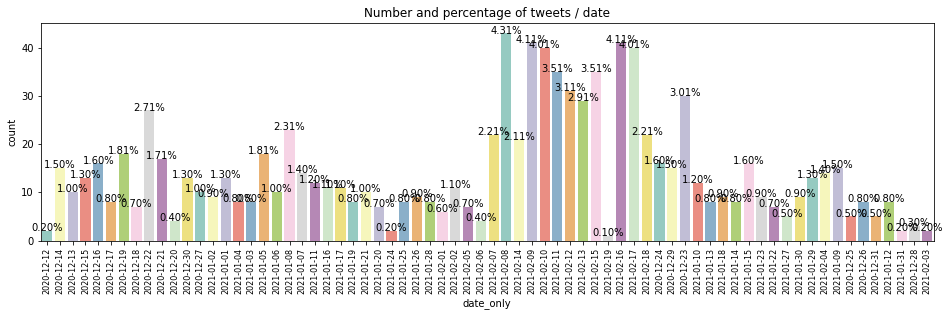

In [ ]:
plot_count("date_only", "tweets / date", tweets_df,size=4, ordered=False)

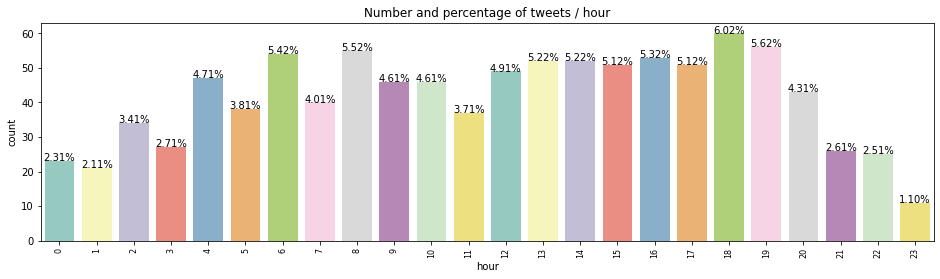

In [ ]:
plot_count("hour", "tweets / hour", tweets_df,size=4, ordered=False)

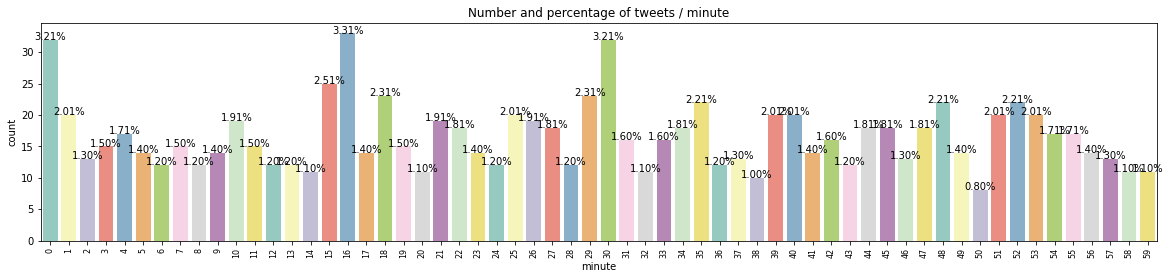

In [ ]:
plot_count("minute", "tweets / minute", tweets_df,size=5, ordered=False)

## Sentiment analysis

In [ ]:
# borrowed from https://www.kaggle.com/pashupatigupta/sentiments-transformer-vader-embedding-bert
sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    if sia.polarity_scores(post)["compound"] > 0:
        return "Positive"
    elif sia.polarity_scores(post)["compound"] < 0:
        return "Negative"
    else:
        return "Neutral" 

LookupError: ignored

In [ ]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    counts.plot(kind='bar', ax=ax1, color='green')
    percent.plot(kind='bar', ax=ax2, color='blue')
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

In [ ]:
tweets_df['sentiment'] = tweets_df['text'].apply(lambda x: find_sentiment(x))
plot_sentiment(tweets_df, 'sentiment', 'Text')

In [ ]:
show_wordcloud(tweets_df.loc[tweets_df['sentiment']=='Positive', 'text'], title = 'Prevalent words in tweets (Positive sentiment)')

In [ ]:
show_wordcloud(tweets_df.loc[tweets_df['sentiment']=='Negative', 'text'], title = 'Prevalent words in tweets (Negative sentiment)')

In [ ]:
show_wordcloud(tweets_df.loc[tweets_df['sentiment']=='Neutral', 'text'], title = 'Prevalent words in tweets (Neutral sentiment)')